In [57]:
import sys
import os
import json
import glob
import h5py

import numpy as np
import scipy.signal
import scipy.io.wavfile
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

import importlib

sys.path.append('/om2/user/msaddler/python-packages/bez2018model')
import bez2018model
importlib.reload(bez2018model)

sys.path.append('assets_psychophysics')
import util_figures
importlib.reload(util_figures)
import util_figures_stimuli
importlib.reload(util_figures_stimuli)

sys.path.append('assets_datasets')
import stimuli_util
importlib.reload(stimuli_util)


<module 'stimuli_util' from 'assets_datasets/stimuli_util.py'>

14184 207.65234


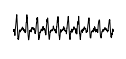

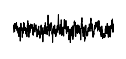

In [203]:
kwargs_nervegram_meanrates = {
    'meanrates_params': {
        'dur': 0.050,
        'fs':20e3,
        'buffer_start_dur': 0.07,
        'buffer_end_dur': 0.01,
    },
    'ANmodel_params': {
        'num_cfs': 100,
        'min_cf':125,
        'max_cf':14e3,
        'spont_list':[70.0],
        'cohc':1.0,
        'bandwidth_scale_factor':1.0,
        'IhcLowPass_cutoff': 3000.0,
        'IhcLowPass_order': 7,
    },
}


# sr = 32000
# t = np.arange(0, 0.150, 1/sr)
# signal = np.zeros_like(t)
# noise = np.random.randn(signal.shape[0])
# f0 = 200
# phase_mode = 'sine'

# freq_list = f0*np.arange(1, 60)
# if phase_mode == 'alt':
#     phase_list = np.pi/2 * np.ones(len(freq_list))
#     phase_list[::2] = 0
# else:
#     phase_list = np.zeros(len(freq_list))
# for freq, phase in zip(freq_list, phase_list):
#     if freq < sr/2:
#         signal = signal + np.sin(2*np.pi*freq*t + phase)

# snr = 12
# dBSPL = 60
# noise = np.random.randn(noise.shape[0])

# y = stimuli_util.combine_signal_and_noise(signal, noise, snr=snr,
#                                           rms_out=20e-6*np.power(10, dBSPL/20))

# fn = '/om/user/msaddler/data_pitchnet/oxenham2004/Oxenham2004_transposedTones_f0_080to320Hz/Oxenham2004_transposedTones_f0_080to320Hz.hdf5'
# f = h5py.File(fn, 'r')
# y = f['stimuli/signal'][3999]
# sr = f['sr'][0]
# f.close()

fn = '/om/scratch/Fri/msaddler/data_pitchnet/PND_v08/noise_TLAS_snr_neg10pos10/PND_sr32000_v08_0000000-0021000.hdf5'
f = h5py.File(fn, 'r')
IDX = 14184#np.random.randint(f['stimuli/signal'].shape[0])
signal = f['stimuli/signal'][IDX]
noise = f['stimuli/noise'][IDX]
f0 = f['nopad_f0_mean'][IDX]
print(IDX, f0)
sr = f['sr'][0]
f.close()

snr = 10
dBSPL = 60

y = stimuli_util.combine_signal_and_noise(signal, noise, snr=snr,
                                          rms_out=20e-6*np.power(10, dBSPL/20))

ipd.display(ipd.Audio(y, rate=sr))


In [188]:
out_dict = bez2018model.nervegram_meanrates(y, sr, **kwargs_nervegram_meanrates)


In [189]:
import util_figures
importlib.reload(util_figures)
import util_figures_stimuli
importlib.reload(util_figures_stimuli)


def figure_wrapper_nervegram_stimulus(ax_arr,
                                      ax_idx_nervegram=1,
                                      ax_idx_spectrum=0,
                                      ax_idx_excitation=2,
                                      ax_idx_waveform=None,
                                      nervegram=None,
                                      nervegram_sr=None,
                                      waveform=None,
                                      waveform_sr=None,
                                      cfs=[],
                                      tmin=None,
                                      tmax=None,
                                      treset=True,
                                      fontsize_title=12,
                                      fontsize_labels=12,
                                      fontsize_legend=12,
                                      fontsize_ticks=12,
                                      fontweight_labels=None,
                                      spines_to_hide_spectrum=['top', 'bottom', 'left', 'right'],
                                      spines_to_hide_excitation=['top', 'bottom', 'left', 'right'],
                                      spines_to_hide_waveform=['top', 'bottom', 'left', 'right'],
                                      nxticks=6,
                                      nyticks=6,
                                      plot_kwargs={},
                                      limits_buffer=0.1,
                                      ax_arr_clear_leftover=True):
    '''
    '''
    # KEEP TRACK OF AXES IN 1D ARRAY
    ax_arr = np.array([ax_arr]).reshape([-1])
    assert len(ax_arr.shape) == 1
    ax_idx_list = []
    # PLOT AUDITORY NERVEGRAM
    if ax_idx_nervegram is not None:
        ax_idx_list.append(ax_idx_nervegram)
        if ax_idx_spectrum is not None:
            nervegram_nxticks = nxticks
            nervegram_nyticks = 0
            nervegram_str_xlabel = 'Time (s)'
            nervegram_str_ylabel = None
        else:
            nervegram_nxticks = nxticks
            nervegram_nyticks = nyticks
            nervegram_str_xlabel = 'Time (s)'
            nervegram_str_ylabel = 'Characteristic frequency (Hz)'
        util_figures_stimuli.make_nervegram_plot(ax_arr[ax_idx_nervegram],
                                                 nervegram,
                                                 sr=nervegram_sr,
                                                 cfs=cfs,
                                                 fontsize_title=fontsize_title,
                                                 fontsize_labels=fontsize_labels,
                                                 fontsize_legend=fontsize_legend,
                                                 fontsize_ticks=fontsize_ticks,
                                                 fontweight_labels=fontweight_labels,
                                                 nxticks=nervegram_nxticks,
                                                 nyticks=nervegram_nyticks,
                                                 tmin=tmin,
                                                 tmax=tmax,
                                                 treset=treset,
                                                 str_title=None,
                                                 str_xlabel=nervegram_str_xlabel,
                                                 str_ylabel=nervegram_str_ylabel,
                                                 str_clabel=None)
    # PLOT POWER SPECTRUM
    if ax_idx_spectrum is not None:
        ax_idx_list.append(ax_idx_spectrum)
        fxx, pxx = stimuli_util.power_spectrum(out_dict['pin'], out_dict['pin_fs'])
        IDX = np.logical_and(fxx >= np.min(cfs), fxx <= np.max(cfs))
        x_pxx = pxx[IDX]
        y_pxx = stimuli_util.freq2erb(fxx[IDX])
        xlimits_buffer_pxx = limits_buffer * np.max(x_pxx)
        ylimits_pxx = [np.min(y_pxx), np.max(y_pxx)]
        xlimits_pxx = [np.max(x_pxx) + xlimits_buffer_pxx, np.min(x_pxx) - xlimits_buffer_pxx]
        xlimits_pxx[-1] = 0
        yticks = np.linspace(stimuli_util.freq2erb(cfs[0]), stimuli_util.freq2erb(cfs[-1]), nyticks)
        yticklabels = ['{:.0f}'.format(yt) for yt in stimuli_util.erb2freq(yticks)]
        util_figures_stimuli.make_line_plot(ax_arr[ax_idx_spectrum], x_pxx, y_pxx,
                                            plot_kwargs=plot_kwargs,
                                            fontsize_title=fontsize_title,
                                            fontsize_labels=fontsize_labels,
                                            fontsize_legend=fontsize_legend,
                                            fontsize_ticks=fontsize_ticks,
                                            fontweight_labels=None,
                                            str_title=None,
                                            str_xlabel=None,
                                            str_ylabel='Frequency (Hz)',
                                            xlimits=xlimits_pxx,
                                            ylimits=ylimits_pxx,
                                            xticks=[],
                                            xticklabels=[],
                                            yticks=yticks,
                                            yticklabels=yticklabels,
                                            legend_on=False,
                                            legend_kwargs={},
                                            spines_to_hide=spines_to_hide_spectrum)
    # PLOT EXCITATION PATTERN
    if ax_idx_excitation is not None:
        ax_idx_list.append(ax_idx_excitation)
        x_exc = np.mean(nervegram, axis=1)
        y_exc = np.arange(0, nervegram.shape[0])
        xlimits_exc_buffer = limits_buffer * np.max(x_exc)
        xlimits_exc = [np.min(x_exc) - xlimits_exc_buffer, np.max(x_exc) + xlimits_exc_buffer]
        ylimits_exc = [np.min(y_exc), np.max(y_exc)]
        util_figures_stimuli.make_line_plot(ax_arr[ax_idx_excitation], x_exc, y_exc,
                                            plot_kwargs=plot_kwargs,
                                            fontsize_title=fontsize_title,
                                            fontsize_labels=fontsize_labels,
                                            fontsize_legend=fontsize_legend,
                                            fontsize_ticks=fontsize_ticks,
                                            fontweight_labels=fontweight_labels,
                                            str_title=None,
                                            str_xlabel=None,
                                            str_ylabel=None,
                                            xlimits=xlimits_exc,
                                            ylimits=ylimits_exc,
                                            xticks=[],
                                            xticklabels=[],
                                            yticks=[],
                                            yticklabels=[],
                                            legend_on=False,
                                            legend_kwargs={},
                                            spines_to_hide=spines_to_hide_excitation)
    # PLOT WAVEFORM
    if ax_idx_waveform is not None:
        ax_idx_list.append(ax_idx_waveform)
        y_wav = np.squeeze(waveform)
        assert len(y_wav.shape) == 1, "waveform must be 1D array"
        x_wav = np.arange(0, y_wav.shape[0]) / waveform_sr
        if (tmin is not None) and (tmax is not None):
            IDX = np.logical_and(x_wav >= tmin, x_wav < tmax)
            x_wav = x_wav[IDX]
            y_wav = y_wav[IDX]
        if treset:
            x_wav = x_wav - x_wav[0]
        xlimits_wav = [x_wav[0], x_wav[-1]]
        ylimits_wav = [np.max(np.abs(y_wav)), -np.max(np.abs(y_wav))]
        ylimits_wav = np.array(ylimits_wav) * (1 + limits_buffer)
        util_figures_stimuli.make_line_plot(ax_arr[ax_idx_waveform], x_wav, y_wav,
                                            plot_kwargs=plot_kwargs,
                                            fontsize_title=fontsize_title,
                                            fontsize_labels=fontsize_labels,
                                            fontsize_legend=fontsize_legend,
                                            fontsize_ticks=fontsize_ticks,
                                            fontweight_labels=fontweight_labels,
                                            str_title=None,
                                            str_xlabel=None,
                                            str_ylabel=None,
                                            xlimits=xlimits_wav,
                                            ylimits=ylimits_wav,
                                            xticks=[],
                                            xticklabels=[],
                                            yticks=[],
                                            yticklabels=[],
                                            legend_on=False,
                                            legend_kwargs={},
                                            spines_to_hide=spines_to_hide_waveform)
    # CLEAR UNUSED AXES
    if ax_arr_clear_leftover:
        for ax_idx in range(ax_arr.shape[0]):
            if ax_idx not in ax_idx_list:
                ax_arr[ax_idx].axis('off')
    return ax_arr


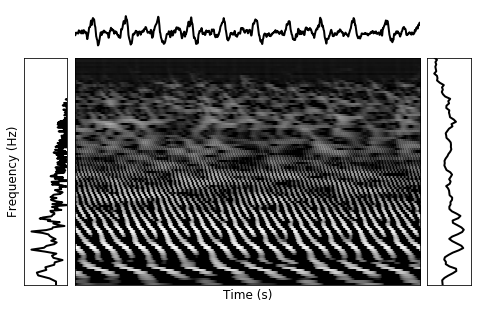

In [222]:
figsize=(8, 5)
nrows=2
ncols=3
gridspec_kw = {
    'wspace': 0.05,
    'hspace': 0.05,
    'width_ratios': [1, 8, 1],
    'height_ratios': [1, 6],
}
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, gridspec_kw=gridspec_kw)

figure_wrapper_nervegram_stimulus(ax_arr,
                                  ax_idx_nervegram=4,
                                  ax_idx_spectrum=3,
                                  ax_idx_excitation=5,
                                  ax_idx_waveform=1,
                                  nervegram=out_dict['meanrates'],
                                  nervegram_sr=out_dict['meanrates_fs'],
                                  waveform=out_dict['pin'],
                                  waveform_sr=out_dict['pin_fs'],
                                  cfs=out_dict['cf_list'],
                                  fontsize_title=12,
                                  fontsize_labels=12,
                                  fontsize_legend=12,
                                  fontsize_ticks=12,
                                  fontweight_labels=None,
                                  plot_kwargs={'lw':2},
                                  limits_buffer=0.2,
                                  nxticks=0, 
                                  nyticks=0,
                                  spines_to_hide_spectrum=[],
                                  spines_to_hide_excitation=[],
                                  spines_to_hide_waveform=['top', 'bottom', 'left', 'right'])

plt.show()

# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_02_03_pitchnet_paper_figures/'
# save_fn = os.path.join(save_dir, 'tmp_schematic_training_stimulus_{}_nervegram_noise.pdf'.format(IDX))
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=True)



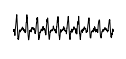

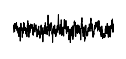

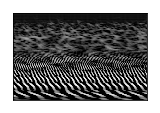

In [221]:
### 

figsize = (1.8, 0.6)
tmin = 0.075
tmax = 0.121
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
ax = figure_wrapper_nervegram_stimulus(ax,
                                      ax_idx_nervegram=None,
                                      ax_idx_spectrum=None,
                                      ax_idx_excitation=None,
                                      ax_idx_waveform=0,
                                      waveform=signal,
                                      waveform_sr=sr,
                                      tmin=tmin,
                                      tmax=tmax,
                                      treset=True)
plt.show()
# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_02_03_pitchnet_paper_figures/'
# save_fn = os.path.join(save_dir, 'tmp_schematic_training_stimulus_{}_waveform_signal.pdf'.format(IDX))
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=True)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
ax = figure_wrapper_nervegram_stimulus(ax,
                                      ax_idx_nervegram=None,
                                      ax_idx_spectrum=None,
                                      ax_idx_excitation=None,
                                      ax_idx_waveform=0,
                                      waveform=noise,
                                      waveform_sr=sr,
                                      tmin=tmin,
                                      tmax=tmax,
                                      treset=True)
plt.show()
# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_02_03_pitchnet_paper_figures/'
# save_fn = os.path.join(save_dir, 'tmp_schematic_training_stimulus_{}_waveform_noise.pdf'.format(IDX))
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=True)


figsize=(2.4, 1.6)
nrows=1
ncols=1
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
figure_wrapper_nervegram_stimulus(ax_arr,
                                  ax_idx_nervegram=0,
                                  ax_idx_spectrum=None,
                                  ax_idx_excitation=None,
                                  ax_idx_waveform=None,
                                  nervegram=out_dict['meanrates'],
                                  nervegram_sr=out_dict['meanrates_fs'],
                                  waveform=out_dict['pin'],
                                  waveform_sr=out_dict['pin_fs'],
                                  cfs=out_dict['cf_list'],
                                  fontsize_title=12,
                                  fontsize_labels=12,
                                  fontsize_legend=12,
                                  fontsize_ticks=12,
                                  fontweight_labels=None,
                                  plot_kwargs={'lw':2},
                                  limits_buffer=0.2,
                                  nxticks=0, 
                                  nyticks=0,
                                  spines_to_hide_spectrum=[],
                                  spines_to_hide_excitation=[],
                                  spines_to_hide_waveform=['top', 'bottom', 'left', 'right'])
ax_arr.set_xlabel(None)
ax_arr.set_ylabel(None)
plt.show()
# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_02_03_pitchnet_paper_figures/'
# save_fn = os.path.join(save_dir, 'tmp_schematic_training_stimulus_{}_nervegram_signal_in_noise.pdf'.format(IDX))
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=True)


302


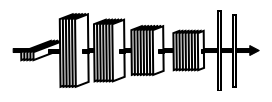

In [55]:
import os
import sys
import json
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches


def load_brain_arch(brain_arch_fn):
    '''
    '''
    with open(brain_arch_fn) as f:
        brain_arch_layer_list = json.load(f)
    return brain_arch_layer_list


def process_cnn_layer_list(brain_arch_layer_list, n_classes=700):
    '''
    '''
    layer_list = []
    for brain_arch_layer in brain_arch_layer_list:
        layer_type = brain_arch_layer['layer_type']
        layer_name = brain_arch_layer['args']['name']
        if 'conv2d' in layer_type:
            layer_dict = {
                'name': layer_name,
                'type': layer_type,
                'dim_n': brain_arch_layer['args']['filters'],
                'dim_h': brain_arch_layer['args']['kernel_size'][0],
                'dim_w': brain_arch_layer['args']['kernel_size'][1],
            }
            layer_list.append(layer_dict)
        elif 'dense' in layer_type:
            layer_dict = {
                'name': layer_name,
                'type': layer_type,
                'dim_n': brain_arch_layer['args']['units'],
            }
            layer_list.append(layer_dict)
        elif 'classification' in layer_type:
            layer_dict = {
                'name': layer_name,
                'type': layer_type,
                'dim_n': brain_arch_layer['args'].get('units', n_classes),
            }
            layer_list.append(layer_dict)
    return layer_list


def get_xy_from_center(center=(0, 0),
                       w=1.0,
                       h=1.0,
                       theta=(0, 0, 0)):
    '''
    '''
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(theta[0]), -np.sin(theta[0])],
        [0, np.sin(theta[0]), np.cos(theta[0])],
    ])
    Ry = np.array([
        [np.cos(theta[1]), 0, np.sin(theta[1])],
        [0, 1, 0],
        [-np.sin(theta[1]), 0, np.cos(theta[1])],
    ])
    Rz = np.array([
        [np.cos(theta[2]), -np.sin(theta[2]), 0],
        [np.sin(theta[2]), np.cos(theta[2]), 0],
        [0, 0, 1],
    ])
    xyz_centered = np.array([
        [-w/2, -h/2, 0],
        [-w/2, +h/2, 0],
        [+w/2, +h/2, 0],
        [+w/2, -h/2, 0]
    ])
    xyz = np.zeros_like(xyz_centered)
    xyz[:, 0] = center[0]
    xyz[:, 1] = center[1]
    R = np.matmul(np.matmul(Rx, Ry), Rz)
    xyz_centered = np.matmul(xyz_centered, R)
    xyz = xyz + xyz_centered
    return xyz[:, 0:2]


def draw_cnn_from_layer_list(ax, layer_list,
                             key_dim_w='dim_w',
                             key_dim_h='dim_h',
                             key_dim_n='dim_n',
                             gap_interlayer=1.0,
                             gap_intralayer=0.2,
                             theta_conv=(np.pi/9, np.pi/2.4, -np.pi/9),
                             theta_fc=(0, 0, 0),
                             range_w=[5e-1, 5e1],
                             range_h=[5e-1, 5e1],
                             limits_buffer=1e-2,
                             arrow_buffer=1.5,
                             arrow_width=0.25,
                             scale_fc=5e-1,
                             spines_to_hide = ['top', 'bottom', 'left', 'right'],
                             kwargs_polygon_update={},
                             kwargs_arrow_update={}):
    '''
    '''
    kwargs_polygon = {
        'ec': [0.0]*3,
        'fc': [1.0]*3,
        'lw': 2,
        'fill': True,
        'alpha': 1.0,
    }
    kwargs_polygon.update(kwargs_polygon_update)
    kwargs_arrow = {
        'width': arrow_width,
        'length_includes_head': True,
        'head_width': arrow_width * 2.5,
        'head_length': arrow_width * 2.5,
        'overhang': 0.0,
        'head_starts_at_zero': False,
        'color': [0.0]*3,
        'zorder': -1,
    }
    kwargs_arrow.update(kwargs_arrow_update)
    
    (xl, yl, zl) = (0, 0, 0)
    for layer in layer_list:
        n = int(np.log2(layer[key_dim_n]))
        if (key_dim_w in layer.keys()) and (key_dim_h in layer.keys()):
            w = np.log2(layer[key_dim_w])
            h = np.log2(layer[key_dim_h])
            if (range_w is not None):
                if w < range_w[0]: w = range_w[0]
                if w > range_w[1]: w = range_w[1]
            if (range_h is not None):
                if h < range_h[0]: h = range_h[0]
                if h > range_h[1]: h = range_h[1]
            for _ in range(n):
                xy = get_xy_from_center(center=(xl, yl), w=w, h=h, theta=theta_conv)
                patch = matplotlib.patches.Polygon(xy, **kwargs_polygon, zorder=zl)
                ax.add_patch(patch)
                zl += 1
                
                if _ == n-1:
                    x_arrow = xl
                    y_arrow = yl
                    dx_arrow = np.max(xy[:, 0]) - xl
                    dy_arrow = 0
                    ax.arrow(x_arrow, y_arrow, dx_arrow, dy_arrow,
                             width=arrow_width,
                             length_includes_head=True,
                             head_width=0,
                             head_length=0,
                             color=kwargs_arrow['color'],
                             zorder=zl)
                    zl += 1
                
                xl += gap_intralayer
        else:
            w = gap_intralayer
            h = n * scale_fc
            xy = get_xy_from_center(center=(xl, yl), w=w, h=h, theta=theta_fc)
            patch = matplotlib.patches.Polygon(xy, **kwargs_polygon, zorder=zl)
            ax.add_patch(patch)
            zl += 1
        xl += gap_interlayer
    
    x_arrow = -arrow_buffer * gap_interlayer
    dx_arrow = xl + arrow_buffer * gap_interlayer + kwargs_arrow['head_length']
    y_arrow = yl
    dy_arrow = 0
    ax.arrow(x_arrow, y_arrow, dx_arrow, dy_arrow, **kwargs_arrow)
    ax.update_datalim([[x_arrow, y_arrow], [x_arrow+dx_arrow, y_arrow+dy_arrow]])
    [x, y, dx, dy] = ax.dataLim.bounds
    ax.set_xlim([x - limits_buffer * dx, x + (1 + limits_buffer) * dx])
    ax.set_ylim([y - limits_buffer * dy, y + (1 + limits_buffer) * dy])
    ax.set_xticks([])
    ax.set_yticks([])
    for spine_key in spines_to_hide:
        ax.spines[spine_key].set_visible(False)
    return ax


# brain_arch_fn = '/saved_models/models_sr20000/arch_0302/PND_v08_TLAS_snr_posInf_AN_BW10eN1_IHC3000Hz_classification0/brain_arch.json'
brain_arch_fn = '/om/scratch/Fri/msaddler/pitchnet/saved_models/arch_search_v01/arch_{:04.0f}/brain_arch.json'

for ARCH_N in [302]:#np.random.randint(0, 302, 20):
    print(ARCH_N)
    brain_arch_layer_list = load_brain_arch(brain_arch_fn.format(ARCH_N))
    layer_list = process_cnn_layer_list(brain_arch_layer_list)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 1.5))
    draw_cnn_from_layer_list(ax, layer_list,
                             limits_buffer=1e-2,
                             arrow_width=0.25,
                             kwargs_polygon_update={'lw': 2.0})
    plt.show()


# save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_02_03_pitchnet_paper_figures/'
# save_fn = os.path.join(save_dir, 'tmp_schematic_cnn.pdf')
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=True)

